In [2]:
import crocoddyl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def random_positions(size:int = 3000,
                     xlim = [-2.1,2.1],
                     ylim = [-2.1,2.1],
                     zlim = [-np.pi/2,np.pi/2],
                     as_tensor:bool = False):

    x = np.random.uniform(*xlim, size = (size, 1))
    y = np.random.uniform(*ylim, size = (size, 1))
    z = np.random.uniform(*zlim, size = (size, 1))
    
    dataset = np.hstack((x, y, z))
    
    if as_tensor:
        dataset = torch.tensor(dataset, dtype = torch.float32)
        return dataset
    
    else: return dataset

In [21]:
starting_position = random_positions(10)

In [31]:
starting_position

array([[-0.56608804, -1.02014949, -0.34892124],
       [ 0.05466902, -1.67634521, -1.51376705],
       [-2.08704869,  1.88644619,  0.72340641],
       [ 0.90959285,  0.65684979,  1.55331612],
       [ 0.65323169, -1.386168  , -1.0127302 ],
       [ 0.17372971, -0.25750386, -0.99989874],
       [ 0.04282839,  1.04487716,  0.91133328],
       [ 1.02077112, -0.80378522, -0.34974746],
       [ 0.72602919,  1.87879727, -0.51331858],
       [-1.35720017,  0.93111752, -1.46719117]])

In [29]:
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T

T  = 30
problem = crocoddyl.ShootingProblem(starting_position[0], [ model ] * T, model)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.solve([], [], 1000)

log1 = log.stops[1:]

del ddp, problem, log, model, T
################################################################
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T

T  = 30
problem = crocoddyl.ShootingProblem(starting_position[1], [ model ] * T, model)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.solve([], [], 1000)

log2 = log.stops[1:]

del ddp, problem, log, model, T
##############################################################

model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T

T  = 30
problem = crocoddyl.ShootingProblem(starting_position[2], [ model ] * T, model)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.solve([], [], 1000)

log3 = log.stops[1:]

del ddp, problem, log, model, T

##################################################################
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T

T  = 30
problem = crocoddyl.ShootingProblem(starting_position[3], [ model ] * T, model)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.solve([], [], 1000)

log4 = log.stops[1:]

del ddp, problem, log, model, T
#########################################################

Text(0.5, 1.0, 'Different Starting Positions for Crocoddyl.')

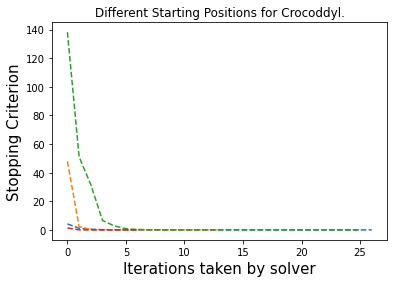

In [30]:



plt.clf()
plt.plot(log1, "--")
plt.plot(log2, '--')
plt.plot(log3, '--')
plt.plot(log4, '--')
plt.ylabel("Stopping Criterion", fontsize = 15)
plt.xlabel("Iterations taken by solver", fontsize = 15)
plt.title("Different Starting Positions for Crocoddyl.")
#plt.savefig("plot1.png")